# Introduction to Data Science and Python

One of the principle aspects of data in 2020 is that there is a lot of it. Dealing with a large volume of data, or at least doing anything interesting with it is tedious unless one can automate the process. In this class we will use Python to automate the things we will do with data.

We will take some time to learn some of the programming and in particular to understand what is happening below. However what we will do in this class is typically take existing programs and try to adapt them to new problems. 

For today, I want to show you some examples of what Python can do for us.

We will analyze some books that are are available from the Guttenberg Project (they are old enough, they have become public domain). Our textbook analyzes <em> Huckleberry Finn </em> and <em> Little Women </em>.  In the interest of not being boring today we will analyze <em> War of Worlds </em> and <em> Journey to the Interior of the Earth </em>. 

<em> War of Worlds </em> by H.G. Wells is a classic science fiction story about an alien invasion of Great Britain.

<em> Journey to the Interior of the Earth </em> is the better translation of Jules Vernes French classic. You might know the story under the name <em> Journey to the Center of the Earth </em>. 


In [2]:
# We will need some Python Packages

import urllib
import pandas as pd

# Note that the difference in these two commands is that import urlib loads the package so that we can refer to its 
# contents as urlib.
# While import pandas as pd imports the package and gives it the alias of pd so that we can refer to its contents as
# pd. See the examples below where we use the <package name or alias>.<function>

import numpy as np
import seaborn
import matplotlib.pyplot as plt

A quick note about the packages above, as these are the ones we will typically use:  

1. *urlib* is a package that lets us read text files into Python using a web address. 
2. *pandas* is a package for dealing with data, it gives us the DataFrame object you see below.
3. *numpy* is a pakcage for doing numerical operations beyond the basic ones, we will need it occasionally for some manipulations.
4. *seaborn* is a pakcage for doing data visualizations with pandas DataFrames.
5. *matplotlib.pyplot* is a package for manipulating some of the graphics elements (size in particular).

In [3]:
# First we read in the text of the book. I copied it from Project Guttenberg and added the word CHAPTER at the
# beginning of each chapter to make them easy to find.

# The text is in Google Drive and the following link will let Python download it
# Note to make this link I needed to copy the "share" link from google drive and then add the code to the link
# below following the "export"

# You can do the same trick with dropbox. Let me know if you need to see how to modify the url in that case.

war_of_worlds_url = 'https://drive.google.com/uc?export=download&id=1N7oFmuvr0ZBcbq-p_jr9j_s98aC0EbTV'
war_of_worlds_file = urllib.request.urlopen(war_of_worlds_url)

# The war_of_worlds_file is a sequence of the lines of the book. 
# The following commands go through each line and concatenate them together.

war_of_worlds_text = ''
for line in war_of_worlds_file:
    # the lines contain some extra characters that .rstrip() removes. The str( , 'utf-8') convertes the byte data
    # to a classic string (classic strings are easier to work with)
    # += appends the new string onto the one we are building that is the whole
    war_of_worlds_text += str(line.rstrip(), 'utf-8')
    
    
# .split() divides up the text now into a separate string everytime it finds the word CHAPTER
war_of_worlds_chapters = war_of_worlds_text.split('CHAPTER ')[1:]

In [4]:
# Here are the first few characters of each chapter

df = pd.DataFrame(war_of_worlds_chapters, columns=['CHAPTER'])
df

,CHAPTER
0,1.I.THE EVE OF THE WAR.No one would have belie...
1,1.II.THE FALLING STAR.Then came the night of t...
2,1.III.ON HORSELL COMMON.I found a little crowd...
3,1.IV.THE CYLINDER OPENS.When I returned to the...
4,1.V.THE HEAT-RAY.After the glimpse I had had o...
5,1.VI.THE HEAT-RAY IN THE CHOBHAM ROAD.It is st...
6,"1.VII.HOW I REACHED HOME.For my own part, I re..."
7,1.VIII.FRIDAY NIGHT.The most extraordinary thi...
8,1.IX.THE FIGHTING BEGINS.Saturday lives in my ...
9,1.X.IN THE STORM.Leatherhead is about twelve m...


In [5]:
# Same operation for our other text. This one already had the "CHAPTER" inserted.

journey_ioe_url = 'https://drive.google.com/uc?export=download&id=14-wYfKOf7d6XM67cOYaYnDOBlWyoXss6'
journey_ioe_file = urllib.request.urlopen(journey_ioe_url)

journey_ioe_text = ''
for line in journey_ioe_file:
    journey_ioe_text += str(line.rstrip(), 'utf-8')
    
journey_ioe_chapters = journey_ioe_text.split('CHAPTER ')[1:]

In [6]:
df = pd.DataFrame(journey_ioe_chapters, columns=['CHAPTER'])
df

,CHAPTER
0,I.THE PROFESSOR AND HIS FAMILYOn the 24th of M...
1,II.A MYSTERY TO BE SOLVED AT ANY PRICEThat stu...
2,"III.THE RUNIC WRITING EXERCISES THE PROFESSOR""..."
3,"IV.THE ENEMY TO BE STARVED INTO SUBMISSION""He ..."
4,"V.FAMINE, THEN VICTORY, FOLLOWED BY DISMAYI ha..."
5,VI.EXCITING DISCUSSIONS ABOUT AN UNPARALLELED ...
6,VII.A WOMAN'S COURAGEThus ended this memorable...
7,VIII.SERIOUS PREPARATIONS FOR VERTICAL DESCENT...
8,IX.ICELAND! BUT WHAT NEXT?The day for our depa...
9,X.INTERESTING CONVERSATIONS WITH ICELANDIC SAV...


We consider the cummulative counts for some particular words in the books. Can you tell when the story in <em> War of the Worlds </em> moves to London? Note how tedious counting these by hand would be!

For <em> Journey to the Interior of the Earth </em>, I am always struck reading this one, how much the the author was convinced that ice rather than lava would be what is found.

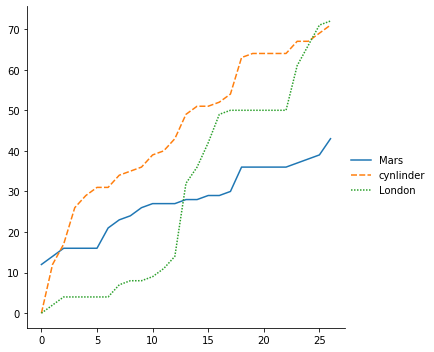

In [7]:
# A pandas DataFrame is a structure for working with data.

counts = pd.DataFrame( [
                        np.char.count(war_of_worlds_chapters, 'Mars'), 
                        np.char.count(war_of_worlds_chapters, 'cylinder'), 
                        np.char.count(war_of_worlds_chapters, 'London')
                       ], index = ['Mars', 'cynlinder', 'London']).transpose()

cum_counts = counts.cumsum()

# Seaborn is a collection fo plotting tools that we will use frequently
# for this graph we use relplot which uses the row index for the horizontal axis and the value for the vertical axis.
# It colors each feature and also adds a nice label.

seaborn.relplot(data = cum_counts, kind='line');

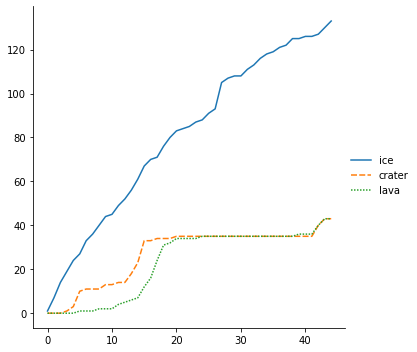

In [8]:
counts = pd.DataFrame( [
                        np.char.count(journey_ioe_chapters, 'ice'), 
                        np.char.count(journey_ioe_chapters, 'crater'), 
                        np.char.count(journey_ioe_chapters, 'lava')
                       ], index = ['ice', 'crater', 'lava']).transpose()

cum_counts = counts.cumsum()

seaborn.relplot(data = cum_counts, kind='line');

An interesting question about language is how complicated the words used are. Let's count the number of characters in each chapter and the number of periods (the number of periods is a proxy for the number of sentences).

In [9]:
# Python is remarkable as a programming language for the shortcuts it allows. 
# This line is a simple command that creates an array with the number of characters in each chapter 
# (it does count spaces and punctuation).

war_of_worlds_characters = [ len(chapter) for chapter in war_of_worlds_chapters ]

# We can count the number fo times a specific character appears. Python knows we want to do this for each chapter so
# it builds the array.
war_of_worlds_periods = np.char.count(war_of_worlds_chapters, '.')

# We then combine the two arrays and make a data frame. 
# Note that I pass labels for the features
# I also have to take the transpose to orient it correctly.

war_of_worlds_data = pd.DataFrame([war_of_worlds_characters, war_of_worlds_periods], 
                                  index=['Number of Characters', 'Number of Periods']).transpose()

In [10]:
# head() displays the first 5 entries in a data frame.

war_of_worlds_data.head()

,Number of Characters,Number of Periods
0,12472,91
1,7265,73
2,5536,54
3,6189,68
4,8089,74


Let me pause here and say something about the orientation of our dataframe. We are almost always going to think about data as the columns (vertical) corresponding to features that we can measure, and then the rows (horizontal) as the samples or individuals we have measured the features of.

In this case the rows are the Chapters in the book; and the features are the Number of Characters in a Chapter, and the Number of Periods in the Chapter.

In [11]:
journey_ioe_characters = [len(chapter) for chapter in journey_ioe_chapters ]
journey_ioe_periods = np.char.count(journey_ioe_chapters, '.')

journey_ioe_data = pd.DataFrame([journey_ioe_characters, journey_ioe_periods], 
                               index=['Number of Characters', 'Number of Periods']).transpose()

In [12]:
journey_ioe_data.head()

,Number of Characters,Number of Periods
0,8233,62
1,7422,59
2,11468,104
3,6873,67
4,9375,91


A large part of this course is going to be spend on visualizations of data. Visualizations will help us look at a large portion of the data at once, and in some cases will help us identify patterns or ways in which we could make conclusions. In this case, let's plot a dot for each chapter on an axis given by the number of characters and the number of periods in the text.

We will plot both books at once in the hopes that we might identify either a similarliaty or a difference.

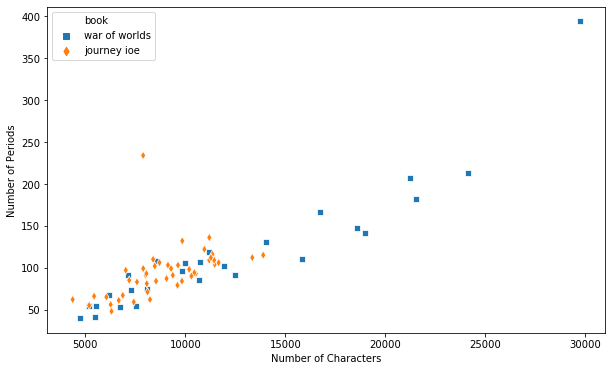

In [116]:
# I am going to combine the two data frames into one so that Seaborn can plot both at once. 
# In order to not lose information I am going to add a feature to the dataframes that gives the name of the book.

# I use .copy() here so that when I add the feature, I do not modify the original dataframe.
# It is not strictly necessary, but it helps with later things we might do.

war_of_worlds_temp = war_of_worlds_data.copy()
war_of_worlds_temp.loc[:, 'book'] = 'war of worlds'

journey_ioe_temp = journey_ioe_data.copy()
journey_ioe_temp.loc[:, 'book'] = 'journey ioe'

# Now I combine the two dataframes.

temp = pd.concat([war_of_worlds_temp, journey_ioe_temp])

# Now we are going to plot them. First I adjust the size to makae the plot a bit bigger than the default size.
plt.figure(figsize = (10, 6) )

# And now the plot command. This time we will use scatterplot.

seaborn.scatterplot(x = 'Number of Characters', y = 'Number of Periods', 
                    hue='book', markers = ['s', 'd'], style = 'book', data=temp)

What do you notice?  What do you wonder?

## Penguins

So maybe studying old novels is not that interesting. Let's look at a more contemporary example. This is a dataset collected as part of an ecological study of penguins in Antiartica.

In [14]:
penguins_url = 'https://drive.google.com/uc?export=download&id=1-SiGKvihMs9sP2I2FZd-sVRm-VnZFihi'

# This dataset is a .csv file (a type of spreadsheet) and so we can read it directly into a pandas DataFrame using 
# read_csv.

penguins_data = pd.read_csv(penguins_url)
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [15]:
# Check what the values of 'species' are
# set() takes a Python list and removes any duplicates

set(penguins_data.loc[:, 'species'])

{'Adelie', 'Chinstrap', 'Gentoo'}

Note for this examples the rows are individual penguins and their measurments. The columns are the features of the penguins. Note that some of the features are descriptive or categorical and some are numerical.

Note also that this is real data. There are some missing values and there are going to be some errors. One of our goals would be to account for or identify errors.

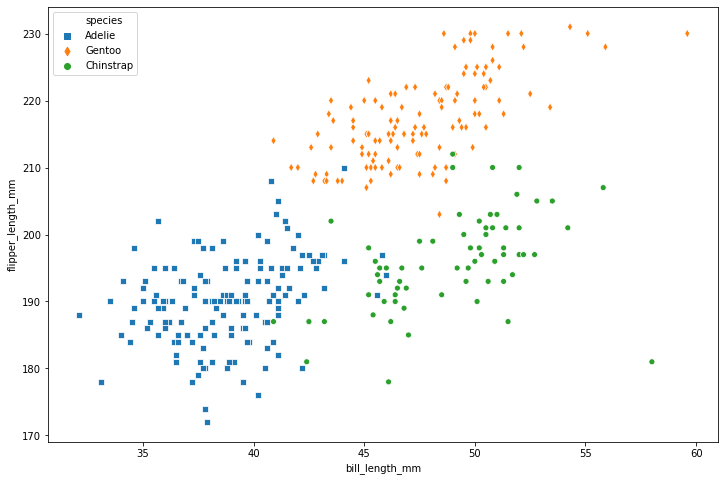

In [17]:
# Let's chose two of the numerical features and plot the penguins coloring them by their species.

plt.figure(figsize = (12, 8))
seaborn.scatterplot(x='bill_length_mm', y='flipper_length_mm', 
                   hue='species', markers = ['s', 'd', 'o'], style = 'species', data=penguins_data)

What do we notice? What do we wonder?

It would be tempting to try and conclude that we can use the *Bill Length* and *Flipper Length* to classify the three species of Penguins. However notice that as we do so the possibility of errors in the classification is high (there are Chinstrap penguins whose measurements place them in the cloud of Adelie penguins for example. 

There are two problems that will appear with real data (and the only interesting data is real).

- Confounding Variables: It might be that there are other variables that explain the differences. I.e. perhaps if we consider *Bill Depth* or *Body Mass* we would be able to see that the Chinstrap penguins mixed with the Adelie penguins above are distinct. 

- Unremovable Random Errors: note that variations in *Bill Length* and *Flipper Length* are due to a great many things and it may be that the natural variations mean that we cannot completely separate the species - i.e. any classification we try to make will have mistakes.

Our book has a nice example of coffee drinking being a confounding variable for lung cancer. What was missed in the early study was that coffee drinkers had a higher proportion of smokers than the general population, and it was smoking that was the actual predictive variable for lung cancer. This made coffee drinking a confounding variable because it appeared to be predictive, but was instead related to the true predictive variable.